In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [4]:
font_path="c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [10]:
tpFileName = 'data/서울특별시_관광지입장정보_2011_2016.json'
jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
tour_table=pd.DataFrame(jsonTP,columns=('yyyymm','resNm','ForNum'))
tour_table=tour_table.set_index('yyyymm')
tour_table

,resNm,ForNum
yyyymm,,
201101,창덕궁,14137
201101,운현궁,0
201101,경복궁,40224
201101,창경궁,697
201101,종묘,6837
...,...,...
201609,국립중앙박물관,12218
201609,덕수궁,25843
201609,서대문자연사박물관,0


In [12]:
resNm = tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [17]:
fv_cFileName='data/중국(112)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_cFileName,'r',encoding='utf-8').read())
china_table=pd.DataFrame(jsonFV,columns=('yyyymm','visit_cnt'))
china_table = china_table.rename(columns={'visit_cnt':'china'})
china_table = china_table.set_index('yyyymm')
china_table

,china
yyyymm,
201101,91252
201102,140571
201103,141457
201104,147680
201105,154066
...,...
201608,513275
201609,591242
201610,650174


In [44]:
fv_jFileName='data/일본(130)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_jFileName,'r',encoding='utf-8').read())
japan_table=pd.DataFrame(jsonFV,columns=('yyyymm','visit_cnt'))
japan_table = japan_table.rename(columns={'visit_cnt':'japan'})
japan_table = japan_table.set_index('yyyymm')
japan_table

,japan
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [24]:
fv_jFileName='data/미국(275)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_jFileName,'r',encoding='utf-8').read())
america_table=pd.DataFrame(jsonFV,columns=('yyyymm','visit_cnt'))
america_table = america_table.rename(columns={'visit_cnt':'america'})
america_table = america_table.set_index('yyyymm')
america_table

,america
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
...,...
201608,63522
201609,63793
201610,77878


In [51]:
fv_table=pd.merge(china_table, japan_table,left_index=True, right_index=True)
fv_table

,china,japan
yyyymm,,
201101,91252,209184
201102,140571,230362
201103,141457,306126
201104,147680,239075
201105,154066,241695
...,...,...
201608,513275,148632
201609,591242,157313
201610,650174,180348


In [54]:
fv_table=pd.merge(fv_table,america_table,left_index=True,right_index=True)
fv_table

,china,japan,america
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [55]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    tour=tour_table[tour_table['resNm']==tourpoint]
    merge_table=pd.merge(tour,fv_table, left_index=True, right_index=True)
    #print(merge_table)

    fig=plt.figure()
    fig.suptitle(tourpoint+"상관관계 분석")

    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자수')
    plt.ylabel('외국인 입장객수')
    r1=merge_table.china.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolors='None', alpha=0.75, s=6, c='black')

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자수')
    plt.ylabel('외국인 입장객수')
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolors='None', alpha=0.75, s=6, c='black')

    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자수')
    plt.ylabel('외국인 입장객수')
    r3=merge_table.america.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table['america']), list(merge_table['ForNum']), edgecolors='None', alpha=0.75, s=6, c='black')

    plt.tight_layout()

    plt.show()
    return[tour_table,r1,r2,r3]


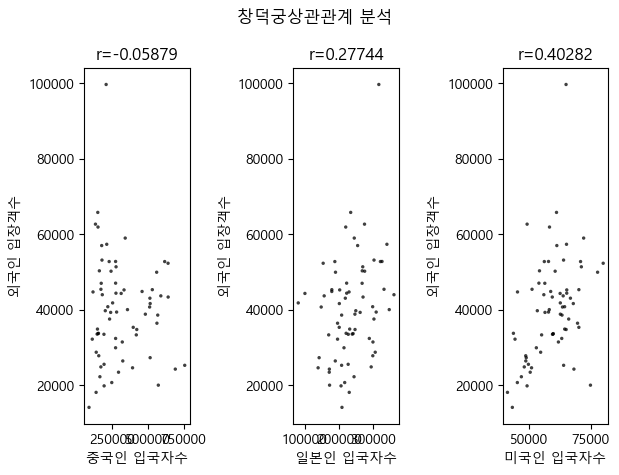

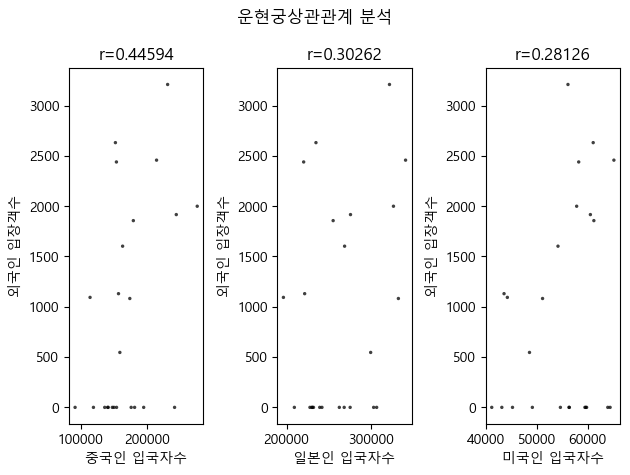

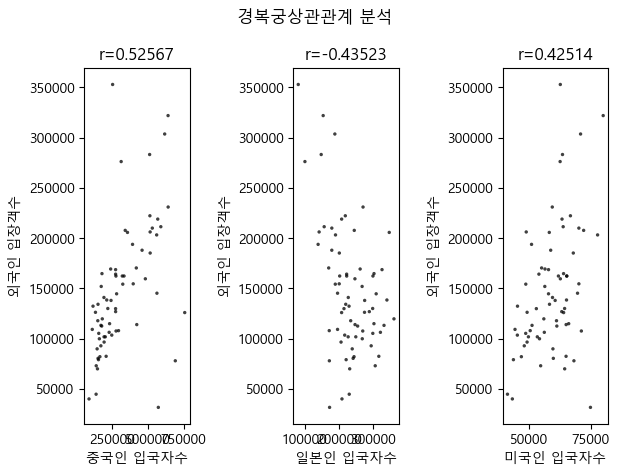

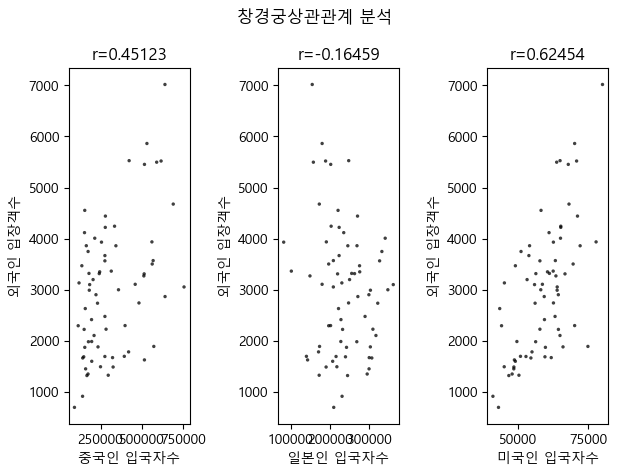

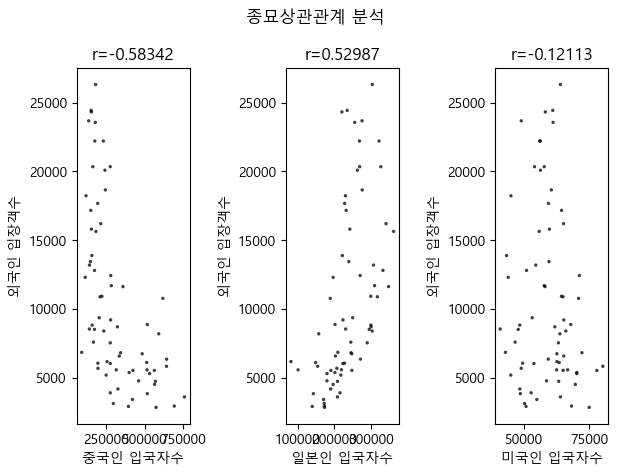

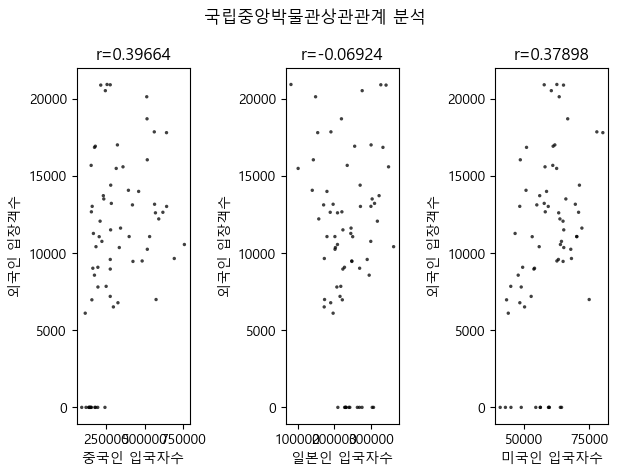

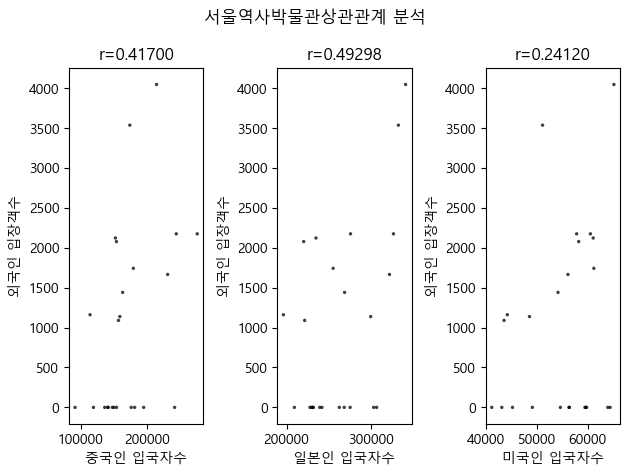

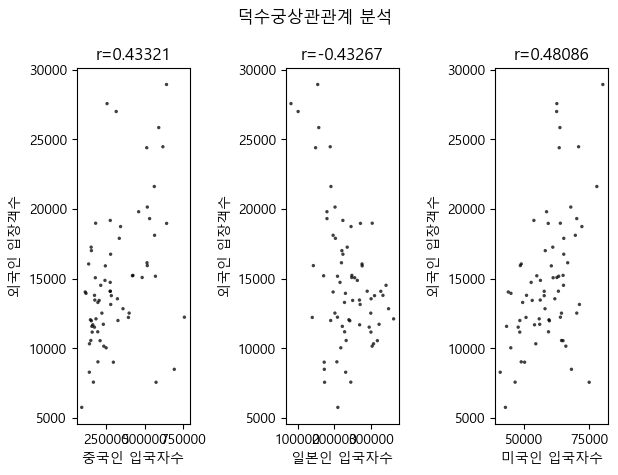

C:\Users\admin\AppData\Local\Temp\ipykernel_1552\3195420785.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


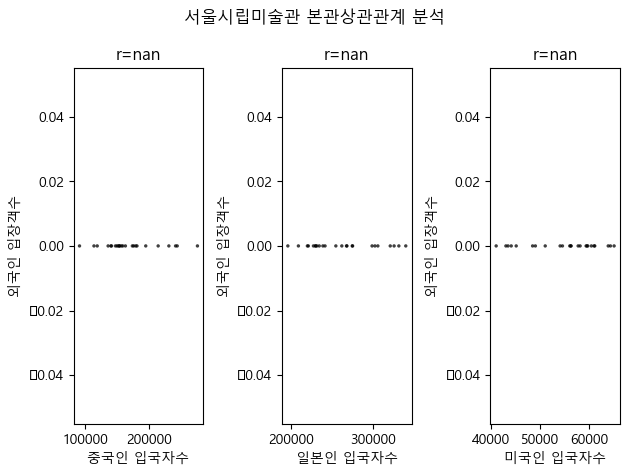

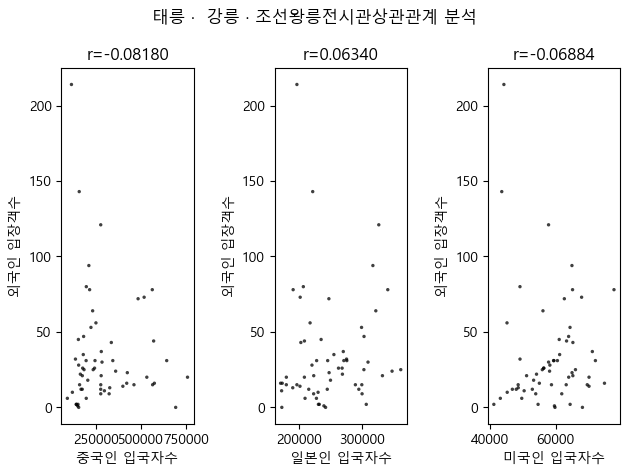

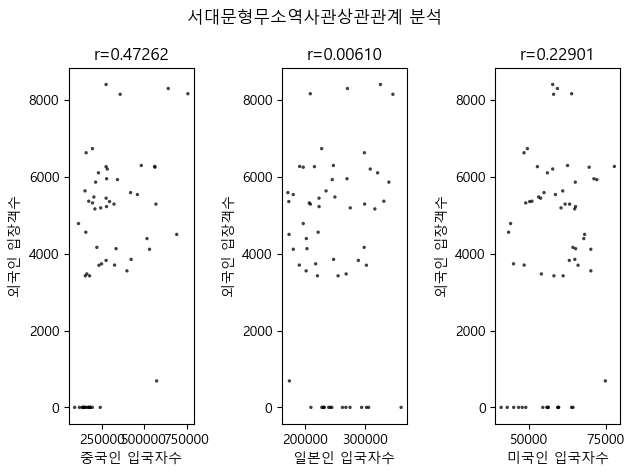

C:\Users\admin\AppData\Local\Temp\ipykernel_1552\3195420785.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


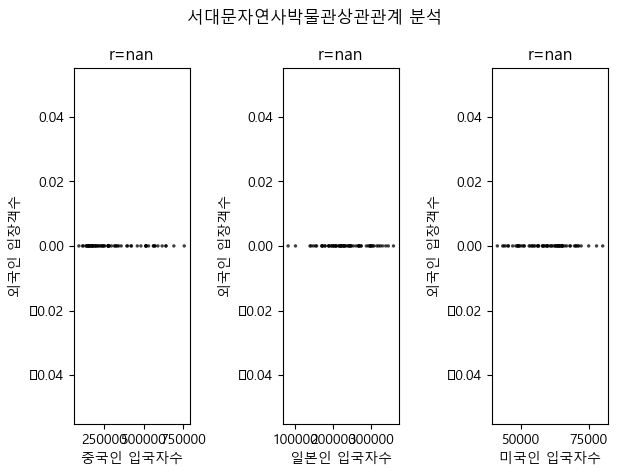

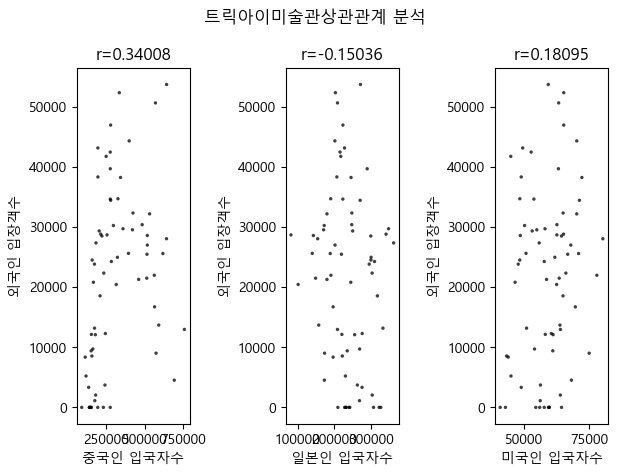

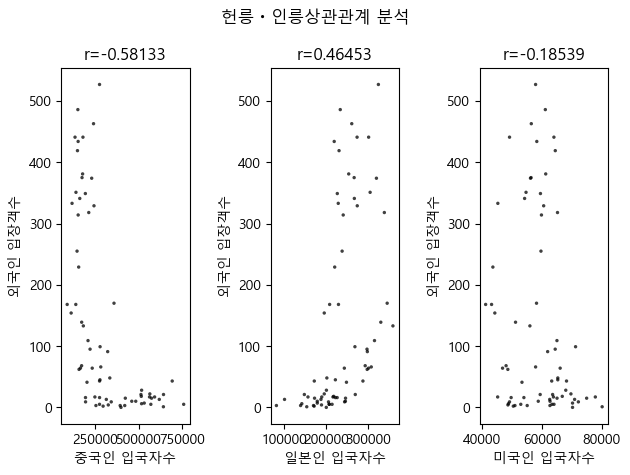

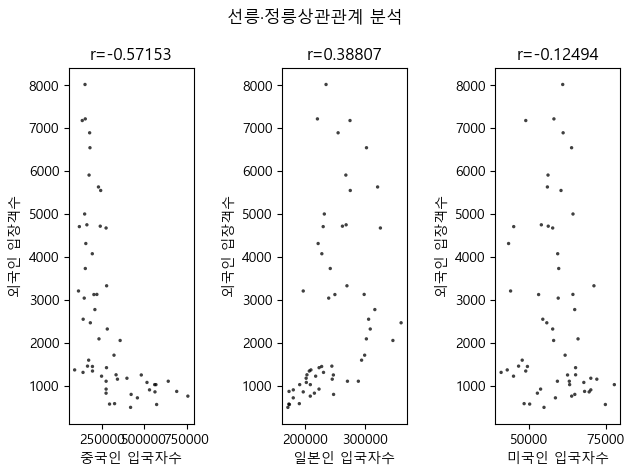

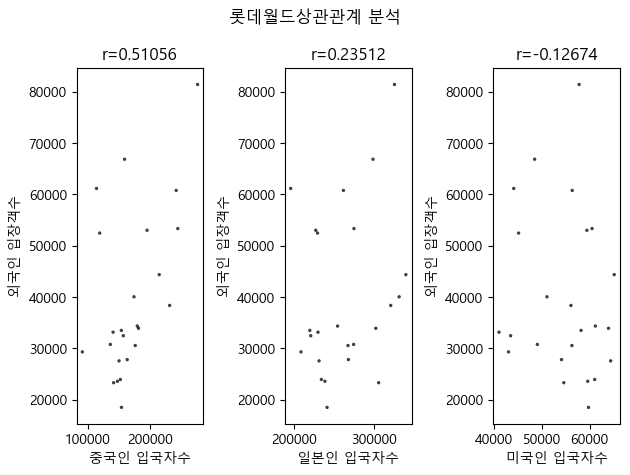

,tourpoint,china,japan,america
0,resNm ForNum yyyymm ...,-0.058791,0.277444,0.402816
1,resNm ForNum yyyymm ...,0.445945,0.302615,0.281258
2,resNm ForNum yyyymm ...,0.525673,-0.435228,0.425137
3,resNm ForNum yyyymm ...,0.451233,-0.164586,0.624540
4,resNm ForNum yyyymm ...,-0.583422,0.529870,-0.121127
5,resNm ForNum yyyymm ...,0.396636,-0.069239,0.378979
6,resNm ForNum yyyymm ...,0.416999,0.492978,0.241198
7,resNm ForNum yyyymm ...,0.433213,-0.432672,0.480859
8,resNm ForNum yyyymm ...,NaN,NaN,NaN
9,resNm ForNum yyyymm ...,-0.081799,0.063403,-0.068840


In [59]:
r_list=[]
for tourpoint in resNm:
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

r_table=pd.DataFrame(r_list, columns=('tourpoint', 'china','japan','america'))
r_table